In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import PandasTools

import pickle 
from tqdm import tqdm
import torch

In [2]:
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [4]:
novartis_original = PandasTools.LoadSDF('../data/novartis/00_novartis_testdata.sdf')

In [5]:
len(novartis_original)

280

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,ISO_SMI,ID,ROMol
0,8.55,5.34,13,basic,Brc1ccc(C2CN3C=CSC3=[NH+]2)cc1,pka_pot_352_1,
1,5.5,5.4,4,basic,C/C(=C\c1cc(C)ccn1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...,pka_pot_085_1,
2,4.5,5.05,5,basic,C/C(=C\c1ccc(C)cn1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...,pka_pot_084_1,
3,5.5,5.36,6,basic,C/C(=C\c1cccc(C)n1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...,pka_pot_083_1,
4,5.0,4.64,32,basic,C/C(=C\c1ccccn1)[C@@H]1C[C@@H]2O[C@]2(C)CCC[C@...,pka_pot_082_1,

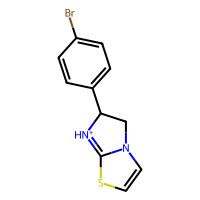
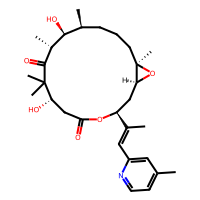
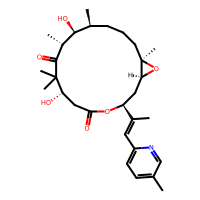
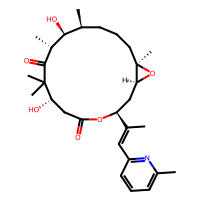
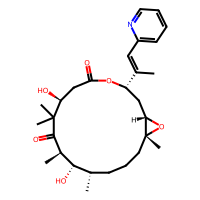

In [10]:
novartis_original.head()

In [6]:
with open('../data/novartis/04_novartis_testdata_mols.pkl', 'rb') as f:
    raw_novartis = pickle.load(f)

In [7]:
len(raw_novartis)

274

In [8]:
with open('../data/novartis/05_novartis_testdata_pyg_data.pkl', 'rb') as f:
    novar = pickle.load(f)

In [9]:
len(novar)

274

In [10]:
set(range(280)) - set([int(i.chembl_id.split('mol')[1]) for i in novar])

{144, 160, 207, 266, 268, 278}

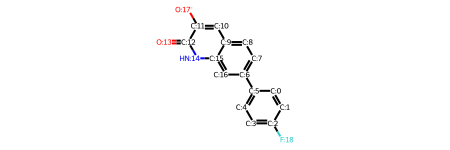

In [18]:
mol_with_atom_index(novartis_original.loc[list({144, 160, 207, 266, 268, 278}), :]['ROMol'].values[1])

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,ISO_SMI,ID,ROMol
160,7.6,6.3,10,basic,Cc1ccc2nc(N)ccc2c1,ht_pka_215_1,
266,8.1,6.85,17,acidic,O=c1[nH]c2cc(-c3ccc(F)cc3)ccc2cc1[O-],ht_pka_185_1,
268,8.2,6.58,17,acidic,O=c1[nH]c2ccc(-c3ccc(F)cc3)cc2cc1[O-],ht_pka_184_1,
207,7.5,6.16,9,basic,Nc1ccc2ccccc2n1,pka_pot_354_1,
144,7.9,6.99,4,basic,Cc1cc(N)nc2ccccc12,ht_pka_281_1,
278,8.0,5.81,14,basic,c1ccc(Nc2nc(NC3CCCCC3)nc3ccccc23)cc1,ht_pka_175_1,

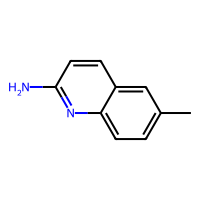
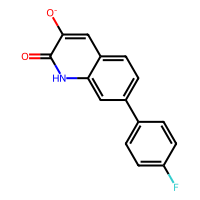
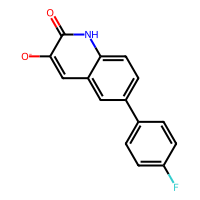
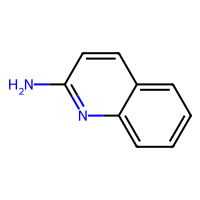
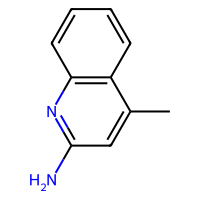
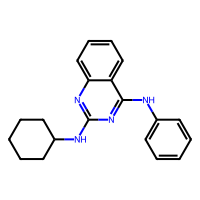

In [15]:
novartis_original.loc[list({144, 160, 207, 266, 268, 278}), :]

In [12]:
prot_smiles = []
deprot_smiles = []
prot_charges = []
deprot_charges = []
pka = []
chembl_ids = []
centers = []

for data in tqdm(novar):
    prot_smiles.append(data.smiles_prop)
    deprot_smiles.append(data.smiles_deprop)
    prot_charges.append(data.charge_prot)
    deprot_charges.append(data.charge_deprot)
    pka.append(data.reference_value.item())
    chembl_ids.append(data.chembl_id)
    centers.append(data.reaction_center)


100%|██████████| 274/274 [00:00<00:00, 66894.02it/s]


In [13]:
exp_df = pd.DataFrame({'exp_id': chembl_ids,
                          'pka': pka,
                          'center': centers,
                          'prot_smiles': prot_smiles,
                          'deprot_smiles': deprot_smiles,
                          'prot_charge': prot_charges,
                          'deprot_charge': deprot_charges})

In [14]:
exp_df.head()

,exp_id,pka,center,prot_smiles,deprot_smiles,prot_charge,deprot_charge
0,mol0,8.55,13,Brc1ccc(C2CN3C=CSC3=[NH+]2)cc1,Brc1ccc(C2CN3C=CSC3=N2)cc1,1,0
1,mol1,5.50,4,C/C(=C\c1cc(C)cc[nH+]1)[C@@H]1C[C@@H]2O[C@]2(C...,C/C(=C\c1cc(C)ccn1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...,1,0
2,mol2,4.50,5,C/C(=C\c1ccc(C)c[nH+]1)[C@@H]1C[C@@H]2O[C@]2(C...,C/C(=C\c1ccc(C)cn1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...,1,0
3,mol3,5.50,6,C/C(=C\c1cccc(C)[nH+]1)[C@@H]1C[C@@H]2O[C@]2(C...,C/C(=C\c1cccc(C)n1)[C@@H]1C[C@@H]2O[C@]2(C)CCC...,1,0
4,mol4,5.00,32,C/C(=C\c1cccc[nH+]1)[C@@H]1C[C@@H]2O[C@]2(C)CC...,C/C(=C\c1ccccn1)[C@@H]1C[C@@H]2O[C@]2(C)CCC[C@...,1,0


In [15]:
unstack_mols = []
seen = set()
c = 0
p = []
for id_ in tqdm(exp_df['exp_id']):
    if id_ not in seen:
        seen.add(id_)
        mols = raw_novartis[id_]['mols']
        c += len(mols)
        for mol in mols:
            unstack_mols.append([mol[0], mol[1]])
            p.append(mol[0].GetProp('pKa_number'))

100%|██████████| 274/274 [00:00<00:00, 134918.91it/s]


In [16]:
exp_df['prot_mol'] = [mol_with_atom_index(i[0]) for i in unstack_mols]
exp_df['deprot_mol'] = [mol_with_atom_index(i[1]) for i in unstack_mols]

In [17]:
charge_idx = []
for idx, prot_charge, deprot_charge in zip(exp_df.index, exp_df['prot_charge'], exp_df['deprot_charge']):
    
    if prot_charge > deprot_charge:
        continue 
    charge_idx.append(idx)

In [18]:
len(charge_idx)

0

In [19]:
from rdkit.Chem.rdmolops import GetFormalCharge
mol_idx = []
for idx, prot_mol, deprot_mol in zip(exp_df.index, exp_df['prot_mol'], exp_df['deprot_mol']):
    
    if GetFormalCharge(prot_mol) > GetFormalCharge(deprot_mol):
        continue 
    mol_idx.append(idx)

In [20]:
len(mol_idx)

10

In [21]:
exp_df.loc[mol_idx, ['prot_mol', 'deprot_mol']] = exp_df.loc[mol_idx, ['deprot_mol', 'prot_mol']].values

In [22]:
from rdkit.Chem.rdmolops import GetFormalCharge
mol_idx = []
for idx, prot_mol, deprot_mol in zip(exp_df.index, exp_df['prot_mol'], exp_df['deprot_mol']):
    
    if GetFormalCharge(prot_mol) > GetFormalCharge(deprot_mol):
        continue 
    mol_idx.append(idx)

In [23]:
len(mol_idx)

0

In [24]:
exp_df['acid_base_type'] = exp_df['exp_id'].apply(lambda x: novartis_original.loc[int(x.split('mol')[1]), 'marvin_pKa_type'])

In [25]:
from rdkit.Chem.MolStandardize import rdMolStandardize
un = rdMolStandardize.Uncharger()

from collections import defaultdict

from molvs import standardize_smiles

In [26]:
acid_base_smarts = pd.read_csv('../data/pka_smarts/smarts_pattern.tsv', delimiter='\t')

In [27]:
mol_acid_base = defaultdict(list)
for idx, center, prot_mol, deprot_mol in zip(range(exp_df.shape[0]), exp_df['center'], exp_df['prot_mol'], exp_df['deprot_mol']):
    #p = Chem.MolFromSmiles(standardize_smiles(Chem.MolToSmiles(mol_with_atom_index(deprot_mol))))
    #mol = Chem.MolFromSmiles(smi)
    #p = deprot_mol
    prot_mol = un.uncharge(prot_mol)
    #mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol_with_atom_index(mol)))
    mol = Chem.AddHs(prot_mol)
    for smart, a in zip(acid_base_smarts['    SMARTS'], acid_base_smarts['Acid_or_base']):
        if mol.HasSubstructMatch(Chem.MolFromSmarts(smart)):
            matches = sum(mol.GetSubstructMatches(Chem.MolFromSmarts(smart)), ())
            #print(smart, matches)
            center = int(center)
            if center in matches:
                #print('here')
                if deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == -1: 
                    if a == 'A':
                        mol_acid_base[idx].append([smart, a])
                        break
                elif deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == 0:
                    if a == 'B':
                        mol_acid_base[idx].append([smart, a])
                        break
                        

In [28]:
len(mol_acid_base)

264

In [29]:
c = 0 
use_i = []
for i in list(mol_acid_base.keys()):
    if exp_df.loc[i, 'acid_base_type'] == 'acidic' and mol_acid_base[i][0][1] == 'A':
        c += 1
        use_i.append(i)
    elif exp_df.loc[i, 'acid_base_type'] == 'basic' and mol_acid_base[i][0][1] == 'B':
        c += 1
        use_i.append(i)
        

In [30]:
not_use_i = set(list(mol_acid_base.keys())) - set(use_i)

In [31]:
len(not_use_i)

7

In [32]:
acid_base_check = exp_df.iloc[list(not_use_i), :]

In [33]:
idx = []
for idx_, center, prot_mol in zip(acid_base_check.index, acid_base_check['center'], acid_base_check['prot_mol']):
    if prot_mol.GetAtomWithIdx(int(center)).GetFormalCharge() == 1 and acid_base_check.loc[idx_, 'acid_base_type'] == 'acidic':
        idx.append(idx_)
        print(idx_, acid_base_check.loc[idx_, 'acid_base_type'])

257 acidic
229 acidic
230 acidic
28 acidic
26 acidic
220 acidic
31 acidic


In [34]:
idx1 = []
for idx_, center, prot_mol in zip(acid_base_check.index, acid_base_check['center'], acid_base_check['prot_mol']):
    if prot_mol.GetAtomWithIdx(int(center)).GetFormalCharge() == 0 and acid_base_check.loc[idx_, 'acid_base_type'] == 'basic':
        idx1.append(idx_)
        print(idx_, acid_base_check.loc[idx_, 'acid_base_type'])

In [35]:
exp_df['acid_base_string'] = str

In [36]:
exp_df.loc[list(mol_acid_base.keys()), 'acid_base_string'] = [i[0][1] for i in list(mol_acid_base.values())]

In [37]:
not_use_i1 = set(exp_df.index) - set(list(mol_acid_base.keys()))

In [38]:
len(not_use_i1)

10

In [39]:
res = []
#check2 = []
for i in not_use_i1:
    print(i)
    prot_mol = exp_df.loc[i, 'prot_mol']
    deprot_mol = exp_df.loc[i, 'deprot_mol']
    prot_charge = exp_df.loc[i, 'prot_charge']
    deprot_charge = exp_df.loc[i, 'deprot_charge']
    center = int(exp_df.loc[i, 'center'])

    if prot_mol.GetAtomWithIdx(center).GetFormalCharge() == 0 and deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == -1: 
        #if prot_charge != 0 or deprot_charge != -1:
        #    check2.append(i)
        res.append('A')
    
    if prot_mol.GetAtomWithIdx(center).GetFormalCharge() == 1 and deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == 0: 
        #if prot_charge != 1 or deprot_charge != 0:
        #    check2.append(i)
        res.append('B')

224
223
39
266
267
181
254
123
190
191


In [40]:
len(res)

10

In [41]:
exp_df.loc[list(not_use_i1), 'acid_base_string'] = res

In [43]:
ROMol = []
#acid_base_num = []
for i in exp_df.index:
    acid_base = exp_df.loc[i, 'acid_base_string']
    #acid_base_string.append(acid_base)
    if acid_base == 'A':
        ROMol.append(exp_df.loc[i, 'prot_mol'])
    elif acid_base == 'B':
        ROMol.append(exp_df.loc[i, 'deprot_mol'])

In [44]:
exp_df['ROMol'] = ROMol

In [45]:
from rdkit.Chem.Descriptors import ExactMolWt, HeavyAtomCount, NumHAcceptors, NumHDonors, MolLogP, NumRotatableBonds

In [46]:
mw, hac, nhd, nha, logp, nrb = [], [], [], [], [], []
for mol in tqdm(exp_df['ROMol']):
    mw.append(ExactMolWt(mol))
    hac.append(HeavyAtomCount(mol))
    nhd.append(NumHDonors(mol))
    nha.append(NumHAcceptors(mol))
    logp.append(MolLogP(mol))
    nrb.append(NumRotatableBonds(mol))

100%|██████████| 274/274 [00:00<00:00, 2069.14it/s]


In [47]:
exp_df.groupby('acid_base_string').count()

,exp_id,pka,center,prot_smiles,deprot_smiles,prot_charge,deprot_charge,prot_mol,deprot_mol,acid_base_type,ROMol
acid_base_string,,,,,,,,,,,
A,93,93,93,93,93,93,93,93,93,93,93
B,181,181,181,181,181,181,181,181,181,181,181


In [48]:
torch.save(exp_df, '../data/novartis/novartis_processed.pt')

# End